In [ ]:
import numpy as np
from scipy.stats import norm
import pandas as pd
N_exp = 10000
N_con = 10000
click_exp = pd.Series(np.random.binomial(1,0.5,size = N_exp))
click_con = pd.Series(np.random.binomial(1,0.2,size = N_con))
exp_id = pd.Series(np.repeat("exp",N_exp))
con_id = pd.Series(np.repeat("con",N_con))
df_exp = pd.concat([exp_id,click_exp],axis = 1)
df_con = pd.concat([con_id,click_con],axis = 1)
#df = pd.concat([df_con,df_exp])
df_exp.columns = ["group","click"]
df_con.columns = ["group","click"]
df_ab_test = pd.concat([df_exp,df_con],axis = 0).reset_index(drop=True)
print(df_ab_test)
print(df_ab_test.groupby("group")["click"].sum())
X_con = df_ab_test.groupby("group")["click"].sum().loc["con"]
X_exp = df_ab_test.groupby("group")["click"].sum().loc["exp"]


#calculating the p_value

p_con_hat = X_con/N_con
p_exp_hat = X_exp/N_exp
print("Click rate probability in control group",p_con_hat)
print("Click rate probability in experimental group",p_exp_hat)


p_pooled = (X_con+X_exp)/(N_con+N_exp)
print("The pooled probability is :",p_pooled)
SE = np.sqrt(p_pooled * (1 - p_pooled) * np.sqrt(1/N_con + 1/ N_exp))
print('The standard error for the data :',SE)
alpha = 0.05
Z_value = norm.ppf(1-alpha / 2)
CI = [round((p_exp_hat - p_con_hat) -Z_value*SE,3) ,
      round((p_exp_hat - p_con_hat) +Z_value*SE,3)]
print("The confidence interval is :",CI)


      group  click
0       exp      0
1       exp      0
2       exp      0
3       exp      1
4       exp      1
...     ...    ...
19995   con      0
19996   con      0
19997   con      0
19998   con      0
19999   con      0

[20000 rows x 2 columns]
group
con    1935
exp    5039
Name: click, dtype: int64
Click rate probability in control group 0.1935
Click rate probability in experimental group 0.5039
The pooled probability is : 0.3487
The standard error for the data : 0.05667271408090786
The confidence interval is : [0.199, 0.421]


# **Udacity Free Trial Screener Model Analysis**

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta

# Number of rows
n_rows = 10000

# Generate user IDs
user_ids = [f"{i}" for i in range(1, n_rows + 1)]

# Generate random clicks (0 or 1)
clicks = np.random.choice([0, 1], size=n_rows)

# Generate groups (randomly assigning "exp" or "con")
groups = np.random.choice(["exp", "con"], size=n_rows)

# Generate random timestamps
start_date = datetime(2023, 1, 1)
end_date = datetime(2023, 12, 31)
timestamps = [start_date + timedelta(seconds=random.randint(0, int((end_date - start_date).total_seconds()))) for _ in range(n_rows)]

# Create the DataFrame
data = {
    "user_id": user_ids,
    "click": clicks,
    "group": groups,
    "timestamp": timestamps
}
df = pd.DataFrame(data)

# Display the first few rows
print(df.head())

# Optionally save to a CSV file
df.to_csv("user_data.csv", index=False)


  user_id  click group           timestamp
0       1      1   con 2023-11-09 11:08:56
1       2      1   con 2023-09-06 08:48:23
2       3      0   con 2023-03-09 02:22:26
3       4      0   con 2023-03-22 19:31:56
4       5      1   con 2023-07-15 15:50:50


In [ ]:
df_ab_test = pd.read_csv('/content/user_data.csv')
print(df_ab_test)

      user_id  click group            timestamp
0           1      1   con  2023-11-09 11:08:56
1           2      1   con  2023-09-06 08:48:23
2           3      0   con  2023-03-09 02:22:26
3           4      0   con  2023-03-22 19:31:56
4           5      1   con  2023-07-15 15:50:50
...       ...    ...   ...                  ...
9995     9996      1   con  2023-05-18 08:55:06
9996     9997      0   exp  2023-07-27 00:10:00
9997     9998      1   exp  2023-07-11 09:06:01
9998     9999      1   exp  2023-11-23 11:33:39
9999    10000      1   con  2023-12-22 04:51:15

[10000 rows x 4 columns]


In [ ]:
print("The first five columns looks like :\n")
print(df_ab_test.head())
print("\nThe statistical description of the data:\n")
print(df_ab_test.describe())
print("\nThe columns of a given data\n")
print(df_ab_test.columns)

The first five columns looks like :

   user_id  click group            timestamp
0        1      1   con  2023-11-09 11:08:56
1        2      1   con  2023-09-06 08:48:23
2        3      0   con  2023-03-09 02:22:26
3        4      0   con  2023-03-22 19:31:56
4        5      1   con  2023-07-15 15:50:50

The statistical description of the data:

           user_id         click
count  10000.00000  10000.000000
mean    5000.50000      0.494300
std     2886.89568      0.499993
min        1.00000      0.000000
25%     2500.75000      0.000000
50%     5000.50000      0.000000
75%     7500.25000      1.000000
max    10000.00000      1.000000

The columns of a given data

Index(['user_id', 'click', 'group', 'timestamp'], dtype='object')


In [ ]:
a = df_ab_test.groupby("group")["click"].sum()
print(a)

group
con    2480
exp    2463
Name: click, dtype: int64


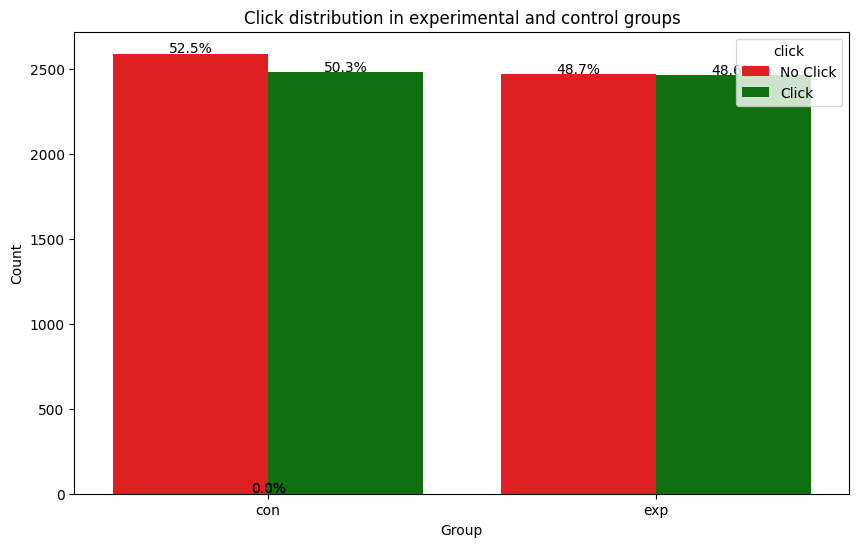

In [ ]:
palette = {0:'red',1:'green'}
plt.figure(figsize = (10,6))
ax = sns.countplot(x = "group" , hue = "click" , data = df_ab_test,palette= palette)
plt.title("Click distribution in experimental and control groups")
plt.xlabel("Group")
plt.ylabel("Count")
plt.legend(title = "click",labels = ["No Click","Click"])

group_counts = df_ab_test.groupby(['group']).size()
group_click_counts = df_ab_test.groupby(['group','click']).size()
for p in ax.patches:
  height = p.get_height()
  group='exp' if p.get_x() < 0.5 else 'con'
  click = 1 if p.get_x() % 1 > 0.5 else 0
  total = group_counts[group]
  percentage = 100*height/total
  ax.text(p.get_x() + p.get_width() /2.,height+5,f'{percentage:.1f}%',ha = 'center',color = 'black' , fontsize = 10)

plt.show()


# **Parameters of the Model from Power Analysis:**


β:probability of type-II error

(1-β):power

α:significance

δ:minimum detectable effect






In [ ]:
alpha = 0.05
print("The alpha value of the data is : ",alpha)
delta  = 0.1
print("The delta  value of the data is :" , delta)


The alpha value of the data is :  0.05
The delta  value of the data is : 0.1


In [ ]:
X_con = df_ab_test.groupby("group")['click'].sum().loc['con']
X_exp = df_ab_test.groupby("group")["click"].sum().loc['exp']
N_exp = df_ab_test.groupby("group")["click"].count()
N_con = df_ab_test.groupby("group")["click"].count()
print("No of users in con group:\n",N_con)
print("No of users in exp group:\n",N_exp)
print("The total clicks in con:\n",X_con)
print("The total clicks in exp:\n",X_exp)

No of users in con group:
 group
con    5068
exp    4932
Name: click, dtype: int64
No of users in exp group:
 group
con    5068
exp    4932
Name: click, dtype: int64
The total clicks in con:
 2480
The total clicks in exp:
 2463


# **Calculating the Pooled estimates for Clicks per group**

In [ ]:
p_con_hat = X_con/N_con
p_exp_hat = X_exp/N_exp
print("Click rate probability in control group",p_con_hat)
print("Click rate probability in experimental group",p_exp_hat)
p_pooled = (X_con+X_exp)/(N_con+N_exp)
print("The pooled probability is :",p_pooled)

Click rate probability in control group group
con    0.489345
exp    0.502839
Name: click, dtype: float64
Click rate probability in experimental group group
con    0.485991
exp    0.499392
Name: click, dtype: float64
The pooled probability is : group
con    0.487668
exp    0.501115
Name: click, dtype: float64


In [ ]:
from scipy.stats import norm
z_value = norm.ppf(1-alpha/2)
print("The z value is :",z_value)
SE = np.sqrt(p_pooled * (1 - p_pooled) * (1/N_con + 1/ N_exp))
print('The standard error for the data :',SE)
CI = [round((p_con_hat - p_exp_hat) - z_value * SE , 3),
      round((p_con_hat - p_exp_hat) + z_value * SE , 3)]

print("The confidence interval of the data as follows :",CI)


The z value is : 1.959963984540054
The standard error for the data : group
con    0.009930
exp    0.010069
Name: click, dtype: float64
The confidence interval of the data as follows : [group
con   -0.016
exp   -0.016
Name: click, dtype: float64, group
con    0.023
exp    0.023
Name: click, dtype: float64]


# **T test value**

In [ ]:
t_test = (p_con_hat-p_exp_hat)/SE
print("The T statistic value is :",t_test)

The T statistic value is : group
con    0.337814
exp    0.342337
Name: click, dtype: float64


# **p Value**

In [ ]:
p_value = 2 * norm.sf(abs(t_test))

def is_statistical_significant(p_value, alpha):
    """
    Determine if the test results are statistically significant.
    Handles both scalar and array-like p_value inputs.
    """
    print(f"The p-value(s): {p_value}")
    if isinstance(p_value, (list, tuple, np.ndarray)):  # Check if p_value is array-like
        significant = [p < alpha for p in p_value]  # Compare each p-value
        if any(significant):  # At least one p-value is significant
            print("The data is statistically significant for at least one test.")
        else:
            print("The data is not statistically significant for any test.")
    else:  # Scalar case
        if p_value < alpha:
            print("The data is statistically significant.")
        else:
            print("The data is not statistically significant.")

is_statistical_significant(p_value,alpha)

The p-value(s): [0.73550329 0.73209752]
The data is not statistically significant for any test.


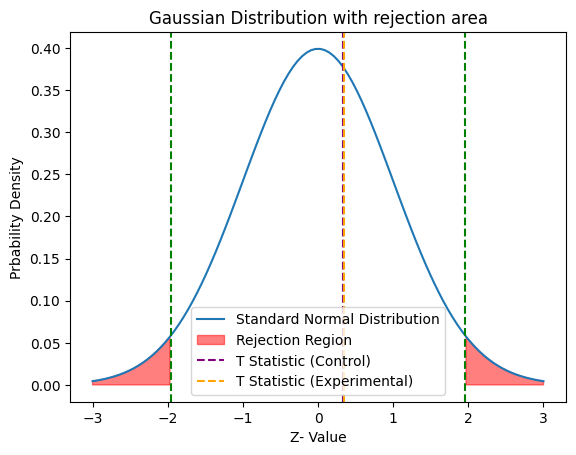

In [ ]:

mu = 0
sigma = 1
x = np.linspace(mu-3*sigma,mu+3*sigma,100)
y = norm.pdf(x,mu,sigma)
# Assuming t_test values for each group
t_test_con = 0.337814
t_test_exp = 0.342337
plt.plot(x,y,label = "Standard Normal Distribution")
plt.fill_between(x,y,where = (x > z_value )| (x < -z_value) , color = "red" , alpha = 0.5, label = "Rejection Region")

# Add vertical lines for each group's T statistic
plt.axvline(t_test_con, color="purple", linestyle="--", label="T Statistic (Control)")
plt.axvline(t_test_exp, color="orange", linestyle="--", label="T Statistic (Experimental)")

plt.axvline(-z_value,color = "green", linestyle = "--")
plt.axvline(z_value,color = "green", linestyle = "--")
plt.xlabel("Z- Value")
plt.ylabel("Probability Density")
plt.title("Gaussian Distribution with rejection area")
plt.legend()
plt.show()

In [ ]:
def is_practically_significant(delta,CI):
  lower_bound = CI[0]
  if lower_bound >= delta:
    print("we have practically significant results")
    return True
  else:
    print("we do not have practically significant results")
    return False

CI = (-0.013,0.023)
delta = 0.1
is_practically_significant(delta,CI)

we do not have practically significant results


False